In [70]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from numpy import *
import math
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import warnings

In [71]:
df = pd.read_csv('Group_17_data_cleaned.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [72]:
df = df.dropna(axis=0)
df.head()
df = df.rename(columns = {'CO2(tCO2)' : 'CO2_tCO2','Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh'})

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# convert date/time strings to timestamps
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']

# scale the feature matrix
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 


scaled_y = scaler.fit_transform(y.values.reshape(-1, 1))

# check the shape and range of the scaled target variable
print(scaled_X.shape)
print(scaled_y.shape)



(35040, 16)
(35040, 1)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.20, random_state=0)

In [74]:
mean_absolute_errors = []
mean_squared_errors = []
root_mean_squared_errors = []
R2_Scores = []

# Linear Regression Model

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regressor.predict(X_test)

In [77]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_absolute_errors.append(mean_absolute_error)
mean_squared_errors.append(mean_squared_error)
root_mean_squared_errors.append(root_mean_squared_error)

In [78]:
print(mean_absolute_error)
print(mean_squared_error)
print(root_mean_squared_error)

0.036099900176909255
0.003181434301287247
0.056404204641916963


In [79]:
w = regressor.coef_
b = regressor.intercept_

In [80]:
w,b

(array([[-1.56064915e-02,  7.25214999e-01,  5.08404800e-03,
          1.64395516e-01,  1.81835426e-01,  1.31059835e-01,
          4.78221140e-04,  5.62598551e-03,  8.12654242e-04,
          2.92754886e-04,  5.33323062e-03,  1.33919456e-03,
          1.73386168e-03,  3.15295022e-03,  3.05887240e-02,
          3.99690610e-02]]),
 array([-0.20914706]))

In [81]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
R2_Scores.append(accuracy)
print(accuracy)

0.9286766006654689


# KNN Base Variant Model

In [82]:
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [83]:
y_pred = model.predict(X_test)

In [84]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_absolute_errors.append(mean_absolute_error)
mean_squared_errors.append(mean_squared_error)
root_mean_squared_errors.append(root_mean_squared_error)

In [85]:
print(mean_absolute_error)
print(mean_squared_error)
print(root_mean_squared_error)

0.011638653673971789
0.0006012801666039722
0.024521014795557957


In [86]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
R2_Scores.append(accuracy)
print(accuracy)

0.9865201222551487


# Decision Tree variant model

### Fitting the training data to the base variant of Decision Tree model.

In [87]:
from sklearn.tree import DecisionTreeRegressor 

###  Fitting the training data to the base variant of Decision Tree model.

In [88]:
regressor = DecisionTreeRegressor(min_samples_split=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=10)

In [89]:
y_pred = regressor.predict(X_test)

###  The errors calculated for the test data are shown below

In [90]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_absolute_errors.append(mean_absolute_error)
mean_squared_errors.append(mean_squared_error)
root_mean_squared_errors.append(root_mean_squared_error)

In [91]:
print(mean_absolute_error)
print(mean_squared_error)
print(root_mean_squared_error)

0.003603688265001252
7.689667207834925e-05
0.008769074756115906


In [92]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
R2_Scores.append(accuracy)
print(accuracy)

0.9982760819395449


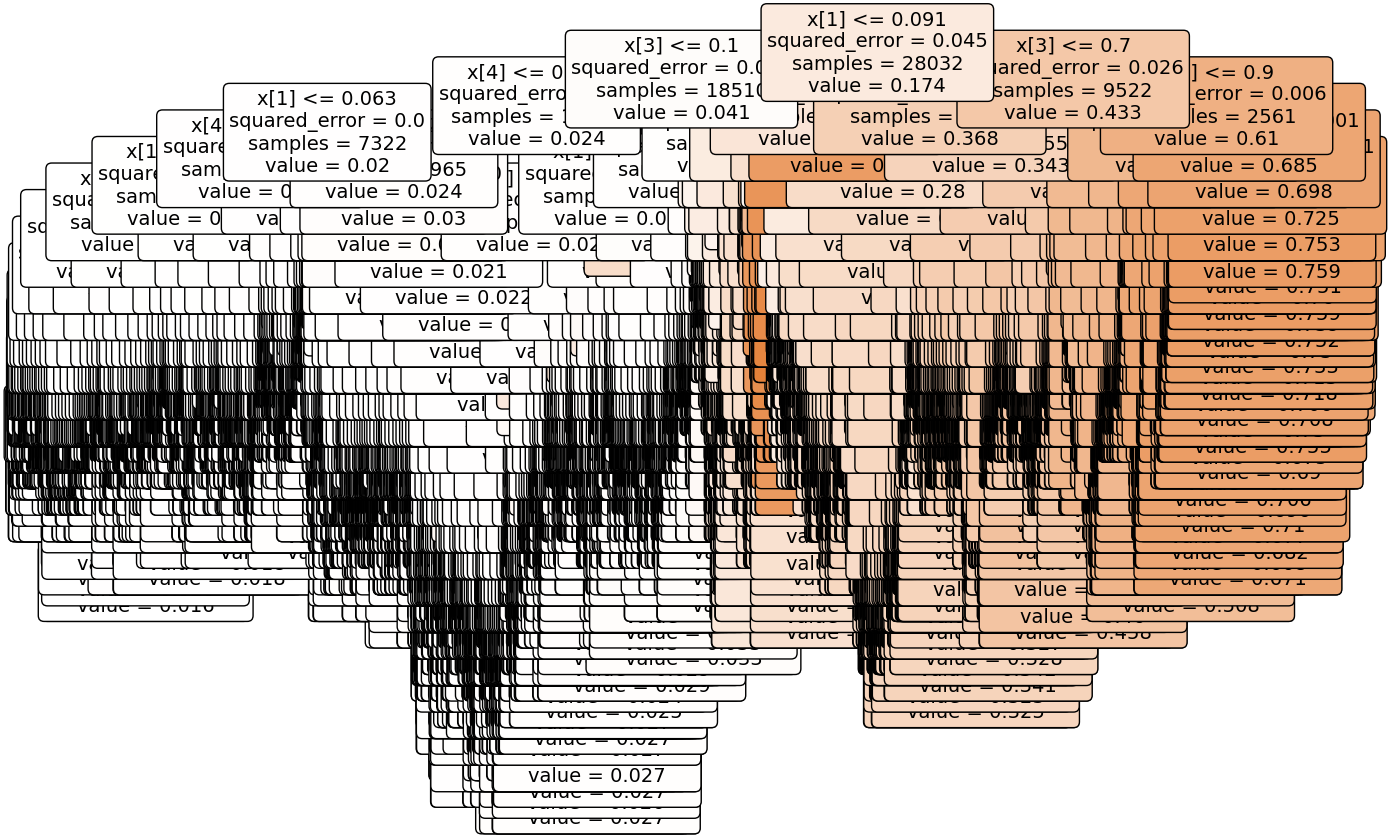

In [93]:
from sklearn import tree
plot.figure(figsize=(15,10))
tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

# Random Forest base variant model

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 100,criterion = 'squared_error',random_state = 0)

In [95]:
rfc.fit(X_train,y_train)

<ipython-input-95-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestRegressor(random_state=0)

In [96]:
y_pred = rfc.predict(X_test)

- These are the errors calculated for the test data.

In [97]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_absolute_errors.append(mean_absolute_error)
mean_squared_errors.append(mean_squared_error)
root_mean_squared_errors.append(root_mean_squared_error)

In [98]:
print(mean_absolute_error)
print(mean_squared_error)
print(root_mean_squared_error)

0.0020462486731031688
3.722133844155542e-05
0.0061009293096671285


In [99]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
R2_Scores.append(accuracy)
print(accuracy)

0.9991655485752579


# Ensemble Models:

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [101]:
#ensemble models
m1 = LinearRegression(copy_X= True, fit_intercept= True)
m2 = KNeighborsRegressor(weights= 'distance', p= 2, n_neighbors= 4)
m3 = DecisionTreeRegressor(splitter='best', min_samples_split= 7, min_samples_leaf= 1 
                                 , max_depth= 4)
m4 = RandomForestRegressor(n_estimators= 10, max_features= 'sqrt', max_depth= 3,bootstrap=True)
m5 = SVR(kernel="linear")
m6 = DecisionTreeRegressor(splitter='best', min_samples_split= 7, min_samples_leaf= 1, 
                                  max_depth= 9)
m7 = RandomForestRegressor()
m8 = DecisionTreeRegressor()
m9 =  KNeighborsRegressor()
m10 = AdaBoostRegressor(n_estimators=10, random_state=0)
m11 = GradientBoostingRegressor(random_state=1)
m12 = XGBRegressor()
m13 = XGBRegressor(n_estimators=5, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
m14 = AdaBoostRegressor(n_estimators=3, random_state=0)
m15 = KNeighborsRegressor(weights= 'distance', p= 2, n_neighbors= 3)
m16 =  DecisionTreeRegressor(splitter='best', min_samples_split= 7, min_samples_leaf= 1, 
                                 max_features= 'auto', max_depth= 3)
m17 = RandomForestRegressor(n_estimators= 300, max_features= 'sqrt', max_depth= 4,bootstrap=False)
m18 = SVR(kernel="rbf")
m19 = DecisionTreeRegressor(splitter='random', min_samples_split= 7, min_samples_leaf= 1, 
                                  max_depth= 2)
m20 = AdaBoostRegressor(n_estimators=10, random_state=0)

In [102]:
# Ensemble regression

en_reg = VotingRegressor(estimators=[('lr', m1),('knn', m2),('dr', m3),('rf', m4),('sv',m5),('dr_1',m6),('rf_1',m7),('dr_2',m8),
    ('knn_1',m9),('abr_5',m10),('gb',m11),('xgb',m12),('xgb_1',m13),('abr',m14),('knn_2',m15),('dr_3',m16),('rf_2',m17),
                                     ('sv_2',m18),('dr_4',m19),('abr_1',m20)])
en_reg = en_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [103]:
# Ensemble model on test data
y_test_pred = en_reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

mean_absolute_errors.append(MAE)
mean_squared_errors.append(MSE)
root_mean_squared_errors.append(RMSE)
R2_Scores.append(r2_score)

The mean squared error is 0.0008698825649314138
The mean absolute error is 0.023009770082888632
The root mean sqaured error is 0.02949377162947143
The regression score is 0.9770363733011392


# SVM with Linear Kernel

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [105]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [106]:
# Ensemble model on test data
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

mean_absolute_errors.append(MAE)
mean_squared_errors.append(MSE)
root_mean_squared_errors.append(RMSE)
R2_Scores.append(r2_score)

The mean squared error is 0.004528332053589929
The mean absolute error is 0.05589875764909955
The root mean sqaured error is 0.06729288263694705
The regression score is 0.9107550111208421


## Non_Linear kernel - polynomial

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [108]:
model = SVR(kernel='poly')
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [109]:
# Ensemble model on test data
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

mean_absolute_errors.append(MAE)
mean_squared_errors.append(MSE)
root_mean_squared_errors.append(RMSE)
R2_Scores.append(r2_score)

The mean squared error is 0.002153295202242656
The mean absolute error is 0.039257211307349396
The root mean sqaured error is 0.046403611952548
The regression score is 0.9615761395815587


# Deep Learning Model

In [110]:
from keras.models import Sequential
from keras.layers import Dense

In [111]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs =100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2176      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
701/701 [==============================] - 3s 3ms/step - loss: 0.0026 - mae: 0.0309 - val_loss: 7.5712e-04 - val_mae: 0.0198
Epoch 2/100
701/701 [==============================] - 2s 3ms/step - loss: 6.0108e-04 - mae: 0.0171 - val_loss: 5.3687e-04 - val_mae: 0.0153
Epoch 3/100
701/701 [===============

In [112]:
# Ensemble model on test data
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

mean_absolute_errors.append(MAE)
mean_squared_errors.append(MSE)
root_mean_squared_errors.append(RMSE)
R2_Scores.append(r2_score)

219/219 [==============================] - 0s 1ms/step
The mean squared error is 6.604102732882116e-05
The mean absolute error is 0.004111765765892479
The root mean sqaured error is 0.00812656306988515
The regression score is 0.9984816154013834


In [113]:
models = ["Linear Regressor","KNN", "Decision Tree" , "Random Forest", "Ensemble model","SVM -linear","SVM-nonLinear","Deep Learning"]

In [119]:
final_results = pd.DataFrame({
    'Classifier': models,
     'R2 Score' : R2_Scores,
    'Mean Absolute Error': mean_absolute_errors,
    'Mean Squared Error': mean_squared_errors,
    'Root Mean Squared Error': root_mean_squared_errors
    
})

In [120]:
final_results

,Classifier,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regressor,0.928677,0.036100,0.003181,0.056404
1,KNN,0.986520,0.011639,0.000601,0.024521
2,Decision Tree,0.998276,0.003604,0.000077,0.008769
3,Random Forest,0.999166,0.002046,0.000037,0.006101
4,Ensemble model,0.977036,0.023010,0.000870,0.029494
5,SVM -linear,0.910755,0.055899,0.004528,0.067293
6,SVM-nonLinear,0.961576,0.039257,0.002153,0.046404
7,Deep Learning,0.998482,0.004112,0.000066,0.008127


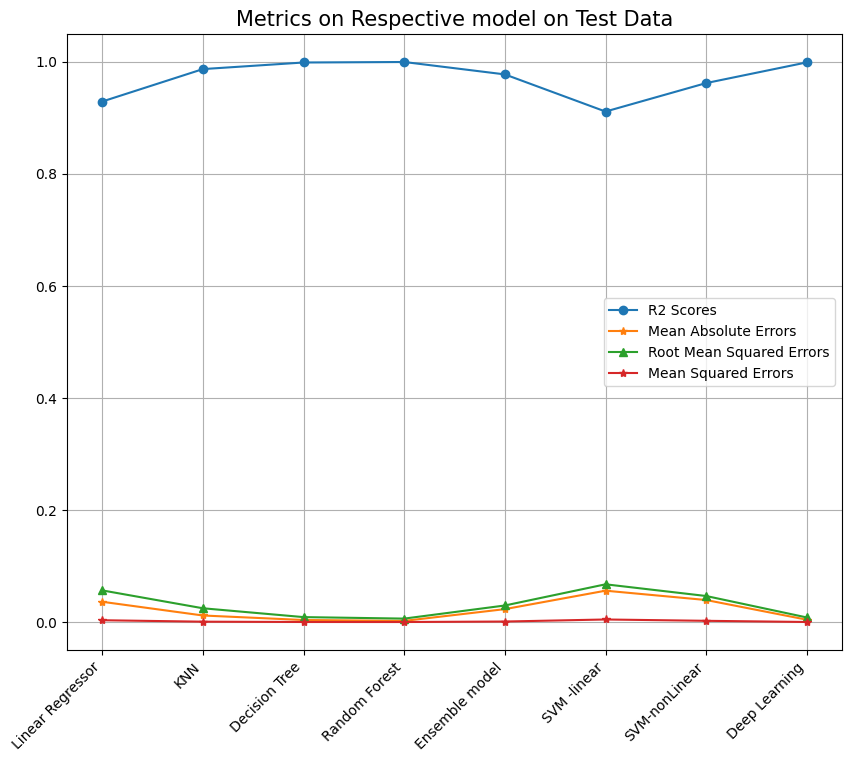

In [129]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
plt.plot(models,R2_Scores, marker='o')
plt.plot(models,mean_absolute_errors, marker='*')
plt.plot(models,root_mean_squared_errors, marker='^')
plt.plot(models,mean_squared_errors, marker='*')
plt.title('Metrics on Respective model on Test Data', fontsize=15)
plt.grid()

plt.xticks(rotation=45, ha='right')  
plt.legend(['R2 Scores', 'Mean Absolute Errors', 'Root Mean Squared Errors', 'Mean Squared Errors'])
plt.show()


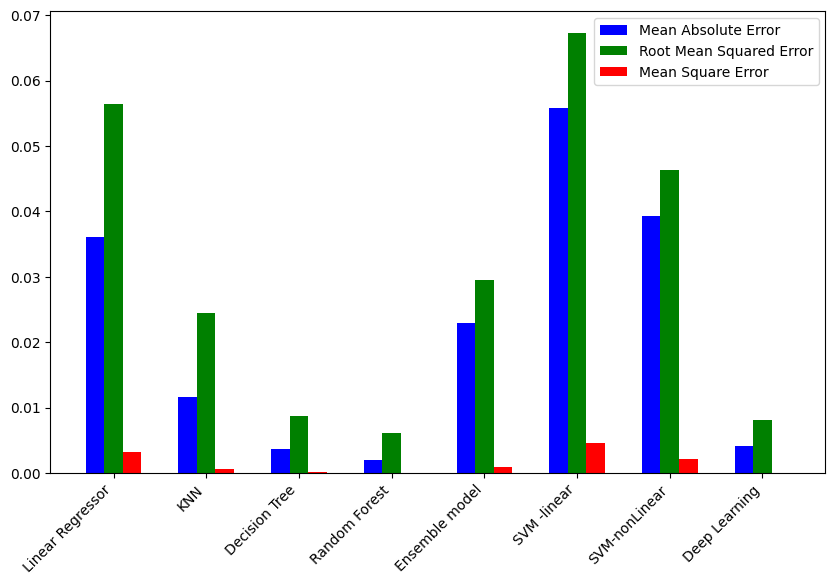

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
x_pos = np.arange(8)
bar_width = 0.2
ax.bar(x_pos,mean_absolute_errors[0:], width=bar_width, color='b')
ax.bar(x_pos+bar_width, root_mean_squared_errors[0:], width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, mean_squared_errors[0:], width=bar_width, color='r')

ax.set_xticks(x_pos+1*bar_width)
ax.set_xticklabels(models[0:],rotation=45,ha='right')
ax.legend(['Mean Absolute Error','Root Mean Squared Error','Mean Square Error'])